# Lab 2: Data Wrangling, Analysis, and Visualization

## Introduction
In this assignment, you will delve into the essential steps of data preprocessing, wrangling, analysis, and visualization. These are crucial techniques in data science to clean, prepare, analyze, and present data effectively. You will be working with three distinct datasets, each presenting unique challenges and learning opportunities.

*Again, you are not required to write any code; just run the cells and observe the outputs, except for the 'Reflection Exercise' section at the end.*

### Overview of the Lab Topics
- **Data Wrangling**: Handling missing values, removing duplicates, converting data types, merging multiple CSV files, and creating new columns
- **Data Analysis**: Performing descriptive statistics, correlation analysis, grouping and aggregation, and trend analysis.
- **Data Visualization**: Creating various types of plots to visualize the data.

This lab will take a while to go through, so don't be afraid to take breaks. And remember to use an AI-copilot as you are going through this to ask questions about bits of code that you don't understand.

You can copy the code into your GenAI tool and ask questions like "Are there other ways of doing this?" "Can you explain the pros and cons of using this option?" "Can you breakdown this code for me in detail?"

I encourage you to do this to make the most out of the lab! 


## 1. Data Wrangling

Data wrangling includes preprocessing and cleaning steps that are critical in the data analysis pipeline. The quality of data directly impacts the quality of insights that can be derived from it. Preprocessing involves transforming raw data into a clean and usable format. Cleaning involves handling missing values, correcting errors, and preparing the data for analysis.

### Handling Missing Values
Missing values are common in datasets and can significantly affect the results of your analysis. Common strategies to handle missing values include:
- **Removal**: Removing rows or columns with missing values.
- **Imputation**: Filling missing values with a specific value such as the mean, median, or mode of the column.
- **Prediction**: Using machine learning models to predict missing values based on other features.

Let's start by importing the required libraries and loading the CSV file for `shopping_behavior` dataset in `Kaggle Ecommerce` and examining the data to identify errors.

In [7]:
# Importing necessary libraries
import os  # Module for interacting with the operating system
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical computations

# Define the relative path to the dataset CSV file
file_path = '../Datasets/Kaggle_Ecommerce/shopping_behavior.csv'

# Read the CSV file into a pandas DataFrame
shop_behav = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
shop_behav.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Handling Missing Values
Identify and handle missing values in the dataset.

This code checks for missing values in the `shop_behav` DataFrame.

- **shop_behav.isnull()**: Identifies all the null (missing) values in the DataFrame.
- **sum()**: Counts the total number of missing values in each column.

The result shows the number of missing values per column, helping us understand the extent of missing data in our dataset.

In [8]:
# Identify missing values
shop_behav.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     1
Location                  0
Size                      0
Color                     2
Season                    0
Review Rating             1
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

<div style="background-color: #ADD8E6; padding: 10px;">

🤖 
<br>
**Now that you know which columns have null values, ask Generative AI about various methods of handling this. Remember to ask about the pros and the cons of different options.**

</div>

This code handles missing values in the `shop_behav` DataFrame. Here, we are filling the missing values with the mean of the corresponding column.

- **missing_cols**: Identifies columns with any missing values.
- **for col in missing_cols**: Iterates through each column with missing values.
    - **if shop_behav[col].dtype in [np.float64, np.int64]**: Checks if the column is numerical.
    - **shop_behav[col].fillna(shop_behav[col].mean(), inplace=True)**: Fills missing values in numerical columns with the column mean.

In [9]:
# Identify columns with missing values
missing_cols = shop_behav.columns[shop_behav.isnull().any()]

# Fill missing values in numerical columns with the mean value of those columns
for col in missing_cols:
    # Check if the column's data type is either float64 or int64 (i.e., a numerical column)
    if shop_behav[col].dtype in [np.float64, np.int64]:
        # Replace NaN values with the mean of the column
        shop_behav[col].fillna(shop_behav[col].mean(), inplace=True)


We again check for missing values, and as can be seen, there are none left.

In [10]:
# Rechecking for missing values
shop_behav.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     1
Location                  0
Size                      0
Color                     2
Season                    0
Review Rating             1
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

### Removing Duplicates
Duplicate records can skew your analysis and lead to incorrect insights. Removing duplicates ensures that each record in your dataset is unique. This is typically done by identifying and removing rows that have identical values across all columns.

This code checks for duplicate rows in the `shov_behav` DataFrame.

- **data2.duplicated()**: Identifies duplicate rows.
- **sum()**: Counts the total number of duplicate rows in the DataFrame.

In [11]:
# Identify duplicates
shop_behav.duplicated().sum()

1

This indicates that the dataset has one duplicate row. We will fix it now.

- **shop_behav.drop_duplicates(inplace=True)**: Removes duplicate rows from the DataFrame and updates `shop_behav` in place.

In [12]:
# Remove duplicates
shop_behav.drop_duplicates(inplace=True)
shop_behav.duplicated().sum()

0

The dataset now has `0` duplicates

### Data Type Conversion
Ensuring that each column has the correct data type is crucial for accurate analysis. In a DataFrame, each column must contain only one type of data. This is because DataFrames are like tables where each column needs to be uniform in type. For example:
- Dates should be stored as date objects.
- Numbers should be in numerical formats like integers or floats.
- Categorical data should be stored as category types.
Let's look at an example with the 'Review Rating' column. This column should contain numbers (floats), but due to some rows having extra text like ' stars', its data type is currently a string (object). Here's what it looks like:

In [13]:
shop_behav['Review Rating'][55:60]

55            3
56          4.7
57    4.4 stars
58          4.2
59          4.6
Name: Review Rating, dtype: object

### Steps to Correct Data Type Conversion

1. **Try to Convert the Column to Float**:

In [14]:
try:
    shop_behav['Review Rating'] = shop_behav['Review Rating'].astype('float')
except ValueError as e:
    print(f"Error encountered: {e}")

Error encountered: could not convert string to float: '4.4 stars'


- This code tries to change 'Review Rating' to float type.
- It fails because some values have ' stars', which can't be converted to a number.
- The error message tells us there's a problem.



2. **Find the Problematic Rows**:

In [15]:
# Create a function to check if a value can be converted to float
def can_convert_to_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Apply the function to each value in 'Review Rating' and find problematic rows
problematic_rows = shop_behav[~shop_behav['Review Rating'].apply(can_convert_to_float)]
print(problematic_rows)


    Customer ID  Age Gender Item Purchased   Category Purchase Amount (USD)  \
57           58   21   Male           Coat  Outerwear                    64   

         Location Size  Color  Season Review Rating Subscription Status  \
57  West Virginia    M  White  Summer     4.4 stars                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
57  Store Pickup              Yes             Yes                  17   

   Payment Method Frequency of Purchases  
57     Debit Card            Fortnightly  


- This code finds rows where 'Review Rating' has the text 'stars'.
- Printing these rows helps us see where the issue is.

3. **Clean the 'Review Rating' Column:**

In [16]:
# Remove ' stars' from 'Review Rating'
shop_behav['Review Rating'] = shop_behav['Review Rating'].str.replace(' stars', '')

- This line removes ' stars' from all values in the 'Review Rating' column.
- Now the column should have only numbers as strings, ready to convert to float.

<div style="background-color: #ADD8E6; padding: 10px;">

🤖 
<br>
**Ask Generative AI the ways you can format these kinds of strings**

</div>


4. **Displaying Data Types**:

In [17]:
shop_behav.dtypes

Customer ID                int64
Age                        int64
Gender                    object
Item Purchased            object
Category                  object
Purchase Amount (USD)     object
Location                  object
Size                      object
Color                     object
Season                    object
Review Rating             object
Subscription Status       object
Shipping Type             object
Discount Applied          object
Promo Code Used           object
Previous Purchases         int64
Payment Method            object
Frequency of Purchases    object
dtype: object


- Displays the data types of all columns in the `shop_behav` DataFrame to verify the conversion. We see that Rating is still an object, so we have to convert it.

In [18]:
# Fixing the 'Review Rating' column by removing the ' stars' string and converting to float
shop_behav['Review Rating'] = shop_behav['Review Rating'].str.rstrip(' stars').astype('float') 

# Display data types of the columns
shop_behav.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)      object
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

Again checking the same rows of the column, we can see that the data type is now `float64`:

In [19]:
shop_behav['Review Rating'][55:60]

55    3.0
56    4.7
57    4.4
58    4.2
59    4.6
Name: Review Rating, dtype: float64

### Merging CSV Files
When working with large datasets, data may be split across multiple files. Merging these files into a single dataset is often necessary. This involves reading each file and concatenating them into one dataframe.

We first load the NOAA dataset and list the files it has.

In [20]:
folder_path = '../Datasets/NOAA_Weather'  # Define the path to the folder containing the CSV files

# List comprehension to find all files in the folder that end with '.csv'
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

print(csv_files)  # Print the list of CSV files to check which files were found

['31285099999.csv', '72484653123.csv', '99999926563.csv']


We can see that it has three different CSV files, which are basically weather data recordings from three different stations. Let's suppose we want to perform an analysis for all three stations, it is much more efficient to concatenate all of them into one and then perform the required tasks.

The below code concatenates multiple CSV files into a single DataFrame.

- **pd.concat([...])**: Concatenates the list of DataFrames into a single DataFrame.
- **[pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]**: This list comprehension reads each CSV file in the `csv_files` list and returns a list of DataFrames.
    - **os.path.join(folder_path, file)**: Constructs the full file path for each CSV file.
    - **pd.read_csv(...)**: Reads the CSV file into a DataFrame.
- **ignore_index=True**: Ensures that the resulting DataFrame has a new, continuous index.

The result is a single DataFrame, `noaa`, containing the data from all the CSV files.

In [21]:
# Load and concatenate all CSV files
noaa = pd.concat([pd.read_csv(os.path.join(folder_path, file)) for file in csv_files], ignore_index=True)

# Display the first few rows of the combined DataFrame
noaa.head()

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,CU2,CU3,CV1,CV2,CV3,CW1,GH1,IB2,KF1,OB1
0,31285099999,2024-01-01T00:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31285099999,2024-01-01T03:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31285099999,2024-01-01T06:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31285099999,2024-01-01T09:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31285099999,2024-01-01T12:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- `pd.concat([...])` combines multiple DataFrames into a single DataFrame.
- `[pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]` reads each CSV file into a DataFrame and creates a list of these DataFrames.
- `ignore_index=True` reindexes the combined DataFrame to have a continuous index.

To verify that `noaa` indeed has all three stations:

In [22]:
noaa['STATION'].unique()

array([31285099999, 72484653123, 99999926563])

### Creating New Columns
Creating new columns from existing data can provide additional insights or make data analysis easier. This can involve operations like arithmetic transformations, conditional logic, or feature engineering.

This code creates a new column 'COORDINATES' in the `noaa` DataFrame by concatenating the 'LATITUDE' and 'LONGITUDE' columns as strings.

- **noaa['LATITUDE'].astype('str')**: Converts the 'LATITUDE' column to strings.
- **noaa['LONGITUDE'].astype('str')**: Converts the 'LONGITUDE' column to strings.
- **noaa['LATITUDE'].astype('str') + ',' + noaa['LONGITUDE'].astype('str')**: Concatenates the latitude and longitude values with a comma in between to form coordinate strings.
- **noaa['COORDINATES']**: Assigns the resulting coordinate strings to a new column 'COORDINATES' in the DataFrame.

In [23]:
# Create a new column "Coordinates", which is "Latitude, Longitude"
noaa['COORDINATES'] = noaa['LATITUDE'].astype('str') + ',' + noaa['LONGITUDE'].astype('str')
noaa.head()

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,CU3,CV1,CV2,CV3,CW1,GH1,IB2,KF1,OB1,COORDINATES
0,31285099999,2024-01-01T00:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"54.5,134.4166666"
1,31285099999,2024-01-01T03:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"54.5,134.4166666"
2,31285099999,2024-01-01T06:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"54.5,134.4166666"
3,31285099999,2024-01-01T09:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"54.5,134.4166666"
4,31285099999,2024-01-01T12:00:00,4,54.5,134.416667,62.0,"UDSKOE, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"54.5,134.4166666"


## 2. Data Analysis

In this section, we will perform various data analysis tasks on the Yelp reviews dataset. This includes descriptive statistics, correlation analysis, grouping and aggregation, and trend analysis.

Let's first load the dataset.

In [24]:
# Importing necessary libraries
import os  # Module for interacting with the operating system
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical computations

file_path = '../Datasets/Yelp_Reviews/reviews.csv'  # Define the path to the CSV file

reviews = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

reviews.head()  # Display the first few rows of the DataFrame

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",7/7/2018 22:09
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,1/3/2012 15:28
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2/5/2014 20:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",1/4/2015 0:01
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,1/14/2017 20:54


### Summary statistics

#### Distribution of Ratings
We analyze the distribution of ratings in the Yelp reviews dataset. Understanding the distribution of ratings can provide insights into customer satisfaction and help identify patterns or trends in the feedback.

- **rating_distribution = reviews['stars'].value_counts().sort_index()**:
    - **reviews['stars']**: Select the 'stars' column from the DataFrame `reviews`, which contains the ratings given in the reviews.
    - **value_counts()**: Counts the occurrence of each unique rating value, giving us the number of reviews for each rating.
    - **sort_index()**: Sorts the counts by the rating values (index) in ascending order.

- **rating_distribution**:
    - This variable now holds a Series with the count of reviews for each rating, sorted by the rating values. It provides a clear view of how many reviews were given for each rating level (e.g., 1 star, 2 stars, etc.).

In [25]:
# Distribution of Ratings
rating_distribution = reviews['stars'].value_counts().sort_index()  # Count the occurrences of each rating and sort by rating value

rating_distribution  # Display the distribution of ratings

stars
1    222
2    148
3    236
4    474
5    883
Name: count, dtype: int64

<div style="background-color: #00008B; padding: 10px; color: white; padding: 10px;">

Now you can try to do something on your own with GenAI!

🤖 **Suggested prompt**
<br>

This is my data:

`<data>`

{paste data}

`</data>`

In my lesson, we ran this code:

`rating_distribution = reviews['stars'].value_counts().sort_index()  # Count the occurrences of each rating and sort by rating value`

Given my dataset, what are some other summary statistics I could look at?

</div>

In [26]:
# paste your AI-generated code here to give it a go:


### Statistical Analysis
Below are some basic statistical analyses you can do on your dataset. 

#### Correlation Analysis: Review Length vs Useful Votes
Here we analyze the statistical correlation between the length of a review and the number of useful votes it receives. By examining this correlation, we can understand if there is a linear relationship between these two variables.

1. Calculate Review Length:

In [27]:
# Create a new column 'review_length' which is the length of each review in characters
reviews['review_length'] = reviews['text'].apply(len)


- **reviews['text']**: Selects the 'text' column from the DataFrame reviews, which contains the review texts.
- **apply(len)**: Applies the len function to each review text, calculating the length of each review in terms of the number of characters.
- **reviews['review_length']**: Creates a new column 'review_length' in the DataFrame reviews to store the length of each review.

2. **Select Relevant Columns**:

In [28]:
# Create a new DataFrame with the relevant columns for correlation analysis
review_length_vs_useful = reviews[['review_length', 'useful']]


- **reviews[['review_length', 'useful']]**: Selects the 'review_length' and 'useful' columns from the DataFrame `reviews` and creates a new DataFrame `review_length_vs_useful` containing these two columns.

3. **Calculate and Display the Correlation**:

In [29]:
# Calculate the correlation between review length and useful votes
correlation = review_length_vs_useful.corr()

# Display the correlation matrix
print(correlation)

               review_length    useful
review_length       1.000000  0.280841
useful              0.280841  1.000000


- **review_length_vs_useful.corr()**: Computes the pairwise correlation of columns in the DataFrame `review_length_vs_useful`.
- **print(correlation)**: Displays the correlation matrix, showing the correlation coefficient between 'review_length' and 'useful'.

The correlation coefficient will provide a measure of how strongly review length and useful votes are related. A coefficient close to 1 indicates a strong positive correlation, close to -1 indicates a strong negative correlation, and close to 0 indicates no correlation.

Here’s the complete code for the correlation analysis:

In [30]:
# Calculate Review Length
reviews['review_length'] = reviews['text'].apply(len)

# Select Relevant Columns
review_length_vs_useful = reviews[['review_length', 'useful']]

# Calculate and Display the Correlation
correlation = review_length_vs_useful.corr()
print(correlation)

               review_length    useful
review_length       1.000000  0.280841
useful              0.280841  1.000000


#### Group Comparison: Average Star Ratings
Here, we will analyze the star ratings of different businesses using Analysis of Variance (ANOVA). In this lab, we will guide you step by step through the process of renaming businesses, filtering data, and performing ANOVA to compare the ratings.

##### Step 1: Load the Dataset

First, we need to load the dataset containing business reviews. We already did this abov, but we can import some additional libraries for the statistical analyses.

In [31]:
# Import necessary libraries
import pandas as pd  # Pandas is used for data manipulation and analysis.
from scipy.stats import f_oneway  # Scipy's f_oneway function is used to perform ANOVA.

file_path = '../Datasets/Yelp_Reviews/reviews.csv'  # Define the path to the CSV file

reviews = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

reviews.head()  # Display the first few rows of the DataFrame

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",7/7/2018 22:09
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,1/3/2012 15:28
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2/5/2014 20:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",1/4/2015 0:01
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,1/14/2017 20:54



- **Pandas (`pd`)**: A powerful data manipulation library in Python. It provides data structures and functions needed to manipulate structured data.
- **SciPy (`f_oneway`)**: A Python library used for scientific and technical computing. Here, we use the `f_oneway` function from SciPy's stats module to perform ANOVA.

##### Step 2: Identify Top 10 Businesses

Next, we will identify the top 10 businesses based on the number of reviews.

In [32]:
# Count the number of reviews for each business and sort in descending order
business_review_counts = reviews['business_id'].value_counts()
top_businesses = business_review_counts.head(10)

# Display the top 10 businesses
print(top_businesses)

business_id
GBTPC53ZrG1ZBY3DT8Mbcw    17
pSmOH4a3HNNpYM82J5ycLA    12
PY9GRfzr4nTZeINf346QOw    11
W4ZEKkva9HpAdZG88juwyQ    10
Zi-F-YvyVOK0k5QD7lrLOg     9
EtKSTHV5Qx_Q7Aur9o4kQQ     9
Dv6RfXLYe1atjgz3Xf4GGw     8
SZU9c8V2GuREDN5KgyHFJw     7
9gObo5ltOMo6UgsaXaHPWA     7
VRGYwKE_Z77frm5NwLvJhw     7
Name: count, dtype: int64


- **`value_counts()`**: A function that counts the unique values in a column.
- **`head(10)`**: Selects the top 10 entries from the Series.

##### Step 3: Rename Top 10 Businesses

We will rename the top 10 businesses as "Business 1", "Business 2", etc., for easier analysis.

In [33]:
# Rename the top 10 businesses as businesses A-J for alphabetical sorting
business_labels = ['Business_A', 'Business_B', 'Business_C', 'Business_D', 'Business_E', 'Business_F', 'Business_G', 'Business_H', 'Business_I', 'Business_J']
top_10_businesses = top_businesses.index[:10].tolist()
business_mapping = {business_id: business_labels[i] for i, business_id in enumerate(top_10_businesses)}

# Create a new column 'business_label' with the new business names
reviews['business_label'] = reviews['business_id'].map(business_mapping)

# Verify that the business labels have been correctly assigned by displaying the top 10 businesses
top_10_renamed = reviews[reviews['business_id'].isin(top_10_businesses)][['business_id', 'business_label']].drop_duplicates()
top_10_renamed = top_10_renamed.sort_values(by='business_label').reset_index(drop=True)
print(top_10_renamed)

              business_id business_label
0  GBTPC53ZrG1ZBY3DT8Mbcw     Business_A
1  pSmOH4a3HNNpYM82J5ycLA     Business_B
2  PY9GRfzr4nTZeINf346QOw     Business_C
3  W4ZEKkva9HpAdZG88juwyQ     Business_D
4  Zi-F-YvyVOK0k5QD7lrLOg     Business_E
5  EtKSTHV5Qx_Q7Aur9o4kQQ     Business_F
6  Dv6RfXLYe1atjgz3Xf4GGw     Business_G
7  SZU9c8V2GuREDN5KgyHFJw     Business_H
8  9gObo5ltOMo6UgsaXaHPWA     Business_I
9  VRGYwKE_Z77frm5NwLvJhw     Business_J


##### Step 4: Filter Data for Top 10 Businesses

We will filter the dataset to include only reviews for the top 10 businesses.

In [34]:
# Filter the dataset to include only the top 10 businesses
top_10_reviews = reviews[reviews['business_label'].notnull()]

# Display the filtered DataFrame
print(top_10_reviews.head(10))

                  review_id                 user_id             business_id  \
37   pHwbdway4yeI-dSSmZA7-Q  qEEk0PuoH1dVa619t8fgpw  PY9GRfzr4nTZeINf346QOw   
44   jC-fGfx-YLqxVBcyTAd4Pw  EBa-0-6AKoy6jziNexDJtg  W4ZEKkva9HpAdZG88juwyQ   
49   cvQXRFLCyr0S7EgFb4lZqw  ZGjgfSvjQK886kiTzLwfLQ  EtKSTHV5Qx_Q7Aur9o4kQQ   
61   4zopEEPqfwm-c_FNpeHZYw  JYYYKt6TdVA4ng9lLcXt_g  SZU9c8V2GuREDN5KgyHFJw   
71   aAcQibR3zWOvk4atbCM3SA  7P9w2PrP4ZcJyDFwch51Ig  Zi-F-YvyVOK0k5QD7lrLOg   
81   7rCsR3SARVF3vXNiw_Csgg  mmdf_Fi-Hh_3uZN5zE164A  9gObo5ltOMo6UgsaXaHPWA   
108  yyrMqY7sNp5gT7KJ1AaYWA  pitYOVSsF8R1gWG1G0qxsA  GBTPC53ZrG1ZBY3DT8Mbcw   
113  3dVcGYz6GokuEytLrfG8bA  FEI0XkOrUHufSW_rfOTPAA  Dv6RfXLYe1atjgz3Xf4GGw   
119  S4nZgOgiv9w8MOiaWTpwBQ  8fPlzYWo0j_nQrJMeyF0Fw  pSmOH4a3HNNpYM82J5ycLA   
143  pJRn59F_lyNO1zT3TCVd0Q  TGgfqWnUaCf6DM7TLuNhDQ  pSmOH4a3HNNpYM82J5ycLA   

     stars  useful  funny  cool  \
37       4       0      0     0   
44       3       0      0     0   
49       5       3      1

##### Step 5: Perform ANOVA

Finally, we will perform ANOVA to compare the average star ratings of the top 10 businesses.

In [35]:
# Perform ANOVA on the star ratings of the top 10 businesses
groups = [top_10_reviews[top_10_reviews['business_label'] == f'Business_{letter}']['stars'] for letter in 'ABCDEFGHIJ']
f_stat, p_value = f_oneway(*groups)

# Display the ANOVA results
print(f"F-statistic: {f_stat}, p-value: {p_value}")

F-statistic: 0.8336292812943005, p-value: 0.5871479728518842


##### Explanation:

- **Loading the Dataset**: We load the data into a pandas DataFrame for easy manipulation.
- **Identifying Top 10 Businesses**: We count and sort the businesses by the number of reviews to find the top 10.
- **Renaming Businesses**: We map the top 10 businesses to new labels for simplicity.
- **Filtering Data**: We filter the DataFrame to include only the reviews of the top 10 businesses.
- **Performing ANOVA**: We use ANOVA to determine if there are significant differences in the average star ratings among the top 10 businesses.


<div style="background-color: #00008B; padding: 10px; color: white; padding: 10px;">

Try to generate another kind of analysis here. 

🤖 **Suggested prompt**
<br>

This is my data:

`<data>`

{paste data}

`</data>`

In my lesson, we just performed a correlation analysis and an ANOVA. What are some other statistical analyses I could perform on my dataset? Please provide the pros and cons of each method and explain briefly how to implement them in Python.

</div>

<div style="background-color: #00008B; padding: 10px; color: white; padding: 10px;">
🤖 
<br>
**Although the explanation of this code block is out of scope for this course, our Generative AI friend can certainly help!**

</div>

### Advanced: Sentiment Analysis

Thanks to GenAI tools, it's now possible for people without much experience to do analyses as advanced and specialized as Sentiment Analysis.

Sentiment analysis is the process of using natural language processing (NLP) and machine learning techniques to determine the emotional tone or sentiment expressed in a piece of text. It is widely used in areas such as social media monitoring, customer feedback analysis, and market research to understand the opinions and feelings of individuals.

And to get code for doing this, you could ask AI something like:

<div style="background-color: #00008B; padding: 10px; color: white; padding: 10px;">

🤖  **Example prompt:**

<br>
How can I perform sentiment analysis on my dataset of customer reviews in Python? Provide a Python code example that classifies the sentiment of each review as positive, negative, or neutral and calculates the distribution of these sentiments.

Here's a sample of my dataset

`<data>`

`{paste data}`

`</data>`

</div>

In [36]:
# Install the necessary libraries
# %pip install pandas textblob

import pandas as pd  # Import the pandas library for data manipulation and analysis
from textblob import TextBlob  # Import the TextBlob library for sentiment analysis

# Function to classify sentiment
def classify_sentiment(text):
    """
    This function takes a text string as input and uses TextBlob to analyze its sentiment.
    It returns 'Positive' if the polarity is greater than 0,
    'Negative' if the polarity is less than 0, and 'Neutral' if the polarity is 0.
    """
    analysis = TextBlob(text)  # Create a TextBlob object to analyze the sentiment of the text
    if analysis.sentiment.polarity > 0:  # Check if the polarity is greater than 0
        return 'Positive'  # Return 'Positive' for positive sentiment
    elif analysis.sentiment.polarity < 0:  # Check if the polarity is less than 0
        return 'Negative'  # Return 'Negative' for negative sentiment
    else:
        return 'Neutral'  # Return 'Neutral' for neutral sentiment

# Apply sentiment analysis to the 'text' column of the reviews DataFrame
reviews['sentiment'] = reviews['text'].apply(classify_sentiment)
# This line applies the classify_sentiment function to each element in the 'text' column
# and stores the result in a new column called 'sentiment'.

# Calculate the distribution of sentiment values
sentiment_distribution = reviews['sentiment'].value_counts()
# This line counts the occurrences of each sentiment category
# (Positive, Negative, Neutral) and stores the result in sentiment_distribution.

# Display the sentiment distribution
sentiment_distribution
# This line prints the distribution of sentiments to the output.


sentiment
Positive    1731
Negative     224
Neutral        8
Name: count, dtype: int64

<div style="background-color: #ADD8E6; padding: 10px;">

🤖 
<br>
**There are many more types of analysis that can be done on this dataset, it's all just a matter of which questions you want answered! For example- you might want to do sentiment analysis over time, i.e., analyze how the sentiment of reviews has changed over time to identify trends or shifts in customer satisfaction.**

</div>

## 3. Data Visualization

In this section, we will create various plots to visualize the data and the results of our analysis.

### Bar Chart for Distribution of Ratings
on
This plot is a bar chart that visualizes the distribution of star ratings in the Yelp reviews dataset. It shows how frequently each star rating (1 to 5 stars) is given, providing insights into overall customer satisfactiotion

- **import matplotlib.pyplot as plt**:
    - Imports the `matplotlib.pyplot` module, which is used for creating visualizations.

- **plt.figure(figsize=(10, 6))**:
    - Creates a new figure with a specified size of 10 inches in width and 6 inches in height.

- **reviews['stars'].value_counts().sort_index().plot(kind='bar')**:
    - **reviews['stars']**: Selects the 'stars' column from the DataFrame `reviews`.
    - **value_counts()**: Counts the occurrence of each unique rating value.
    - **sort_index()**: Sorts the counts by the rating values in ascending order.
    - **plot(kind='bar')**: Creates a bar plot of the sorted rating counts.

- **plt.xlabel('Star Ratings')**:
    - Sets the label for the x-axis to 'Star Ratings'.

- **plt.ylabel('Frequency')**:
    - Sets the label for the y-axis to 'Frequency'.

- **plt.title('Distribution of Star Ratings')**:
    - Sets the title of the plot to 'Distribution of Star Ratings'.

- **plt.show()**:
   - Displays the bar chart.



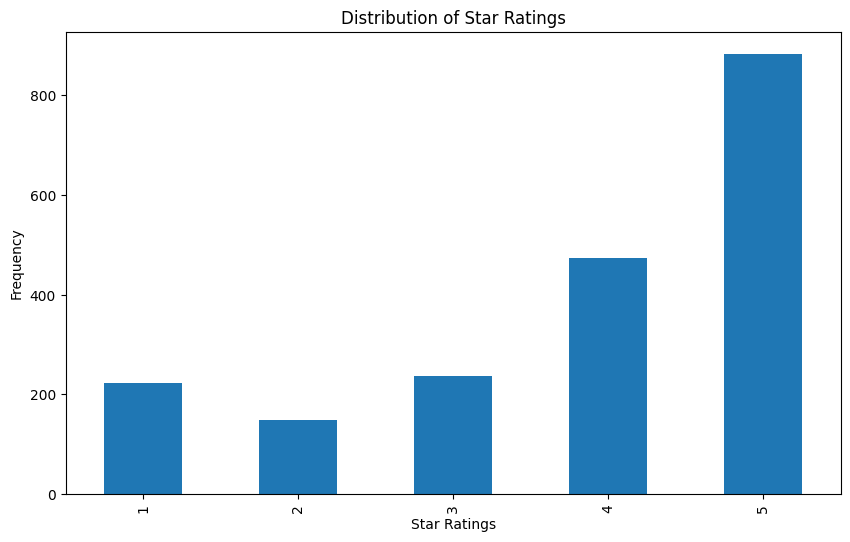

In [37]:
import matplotlib.pyplot as plt

# Importing necessary libraries
import os  # Module for interacting with the operating system
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical computations

file_path = '../Datasets/Yelp_Reviews/reviews.csv'  # Define the path to the CSV file

reviews = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

reviews.head()  # Display the first few rows of the DataFrame
# Bar Chart for Distribution of Ratings
plt.figure(figsize=(10, 6))
reviews['stars'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Star Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Star Ratings')
plt.show()

### Scatter Plot for Review Length vs Useful Votes

This plot is a scatter plot that visualizes the relationship between the length of reviews and the number of useful votes they receive. Each point represents a review, with its position determined by the review's length and the number of useful votes. This helps in identifying any patterns or correlations between these two variables.

- **plt.scatter(reviews['review_length'], reviews['useful'], alpha=0.5)**:
    - **plt.scatter()**: Creates a scatter plot.
    - **reviews['review_length']**: Specifies the x-axis data, which is the length of the reviews.
    - **reviews['useful']**: Specifies the y-axis data, which is the number of useful votes.
    - **alpha=0.5**: Sets the transparency level of the points to 0.5, making it easier to see overlapping points.

- **plt.xlabel('Review Length')**:
    - Sets the label for the x-axis to 'Review Length'.

- **plt.ylabel('Number of Useful Votes')**:
    - Sets the label for the y-axis to 'Number of Useful Votes'.

- **plt.title('Review Length vs Useful Votes')**:
    - Sets the title of the plot to 'Review Length vs Useful Votes'.

- **plt.show()**:
    - Displays the scatter plot.


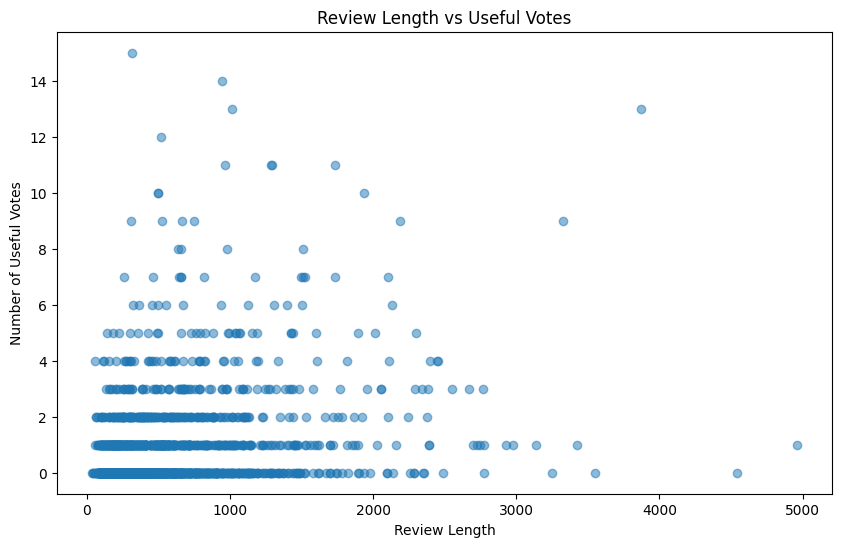

In [38]:
#Calculate review length based on number of characters.
reviews['review_length'] = reviews['text'].apply(len)

# Scatter Plot for Review Length vs Useful Votes
plt.figure(figsize=(10, 6))
plt.scatter(reviews['review_length'], reviews['useful'], alpha=0.5)
plt.xlabel('Review Length')
plt.ylabel('Number of Useful Votes')
plt.title('Review Length vs Useful Votes')
plt.show()

### Line Chart for Average Ratings Over Time
n
This plot is a line chart that visualizes the average star rating of reviews over time. It shows how the average rating has changed monthly, allowing for the identification of trends and patterns in customer satisfaction over the observed perioheight.

- **monthly_avg_rating.plot()**:
    - Plots the `monthly_avg_rat from the Data Analysis sectioning` Series, which contains the average star rating for each month, as a line chart.

- **plt.xlabel('Date')**:
    - Sets the label for the x-axis to 'Date'.

- **plt.ylabel('Average Star Rating')**:
    - Sets the label for the y-axis to 'Average Star Rating'.

- **plt.title('Average Star Rating Over Time')**:
    - Sets the title of the plot to 'Average Stasplays the line chart.


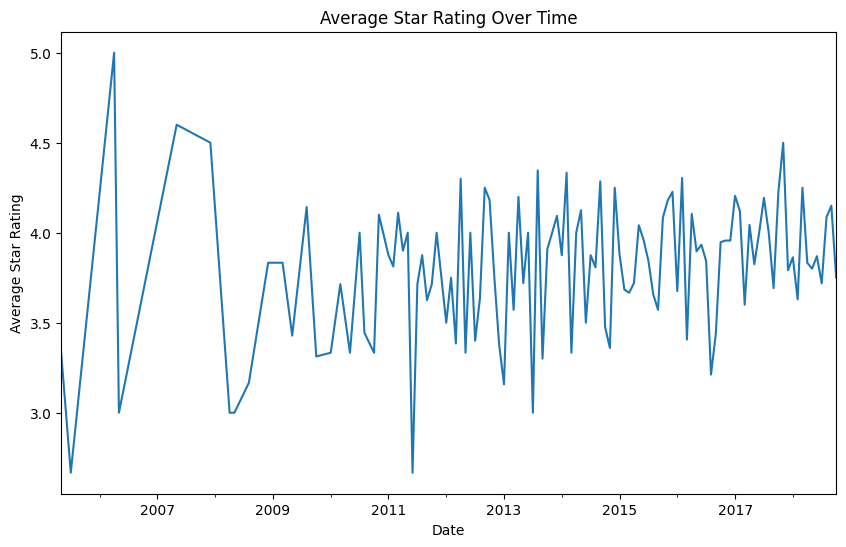

In [39]:
# Calculate the monthly average rating
monthly_avg_rating = reviews.groupby(pd.to_datetime(reviews['date']).dt.to_period('M'))['stars'].mean()

# Line Chart for Average Ratings Over Time
plt.figure(figsize=(10, 6))
monthly_avg_rating.plot()
plt.xlabel('Date')
plt.ylabel('Average Star Rating')
plt.title('Average Star Rating Over Time')
plt.show()

The breaks in the lines indicate that no data was available for these months.

### Pie Chart for Sentiment Distribution

This plot is a pie chart that visualizes the distribution of sentiment classifications (Positive, Negative, Neutral) in the Yelp reviews dataset. It shows the proportion of each sentiment category, providing insights into the overall sentiment of the reviews.

- **sentiment_counts = reviews['sentiment'].value_counts()**:
    - Counts the occurrences of each sentiment category in the 'sentiment' column of the DataFrame `reviews`, which we created in the Data Analysis section.
    - **sentiment_counts**: Stores the counts of each sentiment.

- **plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)**:
    - **plt.pie()**: Creates a pie chart.
    - **sentiment_counts**: Provides the data for the pie chart (the counts of each sentiment).
    - **labels=sentiment_counts.index**: Labels each slice of the pie chart with the sentiment categories.
    - **autopct='%1.1f%%'**: Displays the percentage of each slice with one decimal place.
    - **startangle=140**: Rotates the start of the pie chart to 140 degrees for better visual presentation.

- **plt.title('Sentiment Distribution of Reviews')**:
    - Sets the title of the plot to 'Sentiment Distribution of Reviews'.

- **plt.show()**:
    - Displays the pie chart.

Sentiment column does not exist. Running sentiment analysis...
sentiment
Positive    1731
Negative     224
Neutral        8
Name: count, dtype: int64


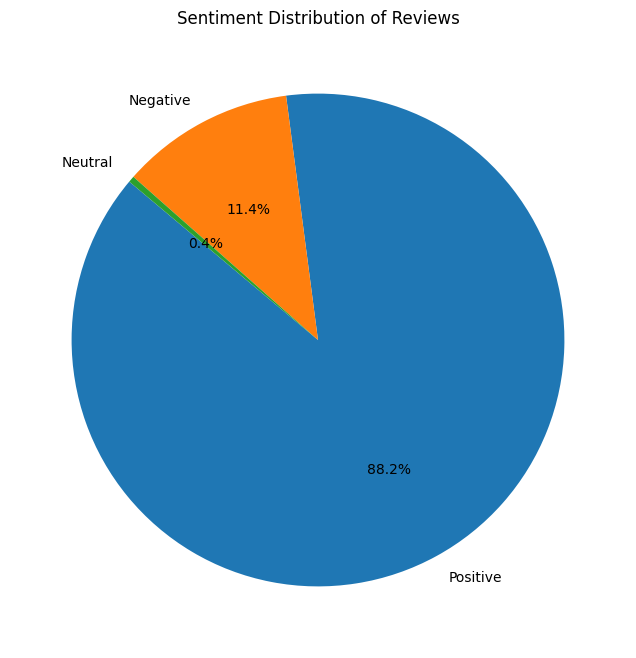

In [40]:
# Check if the 'sentiment' column exists in the DataFrame
if 'sentiment' not in reviews.columns:
    print("Sentiment column does not exist. Running sentiment analysis...")

    # Install the necessary libraries
    # %pip install pandas textblob

    import pandas as pd
    from textblob import TextBlob

    def classify_sentiment(text):
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'Positive'
        elif analysis.sentiment.polarity < 0:
            return 'Negative'
        else:
            return 'Neutral'

    reviews['sentiment'] = reviews['text'].apply(classify_sentiment)

    sentiment_distribution = reviews['sentiment'].value_counts()
    print(sentiment_distribution)

    
# Count the occurrences of each sentiment
sentiment_counts = reviews['sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Reviews')
plt.show()

### Heat Map for Numeric Columns

This plot is a heat map that visualizes the correlation between numeric columns in the Yelp reviews dataset. The heat map shows the strength and direction of the relationships between pairs of variables, helping to identify patterns and potential dependencies.

- **import seaborn as sns**:
    - Imports the `seaborn` library, which is used for creating advanced visualizations.

- **numeric_cols = ['stars', 'useful', 'funny', 'cool']**:
    - Defines a list of numeric columns that will be included in the heat map.

- **corr_matrix = df[numeric_cols].corr()**:
    - Computes the correlation matrix for the selected numeric columns.
    - **df[numeric_cols]**: Selects the specified numeric columns from the DataFrame `df`.
    - **corr()**: Calculates the pairwise correlation coefficients between the columns.

- **plt.figure(figsize=(10, 8))**:
    - Creates a new figure with a specified size of 10 inches in width and 8 inches in height.

- **sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')**:
    - **sns.heatmap()**: Plots the heat map.
    - **corr_matrix**: Provides the data for the heat map (the correlation matrix).
    - **annot=True**: Displays the correlation coefficients on the heat map.
    - **cmap='coolwarm'**: Uses the 'coolwarm' colormap for the heat map.
    - **fmt='.2f'**: Formats the correlation coefficients to two decimal places.

- **plt.title('Correlation Heatmap of Numeric Columns')**:
    - Sets the title of the plot to 'Correlation Heatmap of Numeric Columns'.

- **plt.show()**:
    - Displays the heat map.


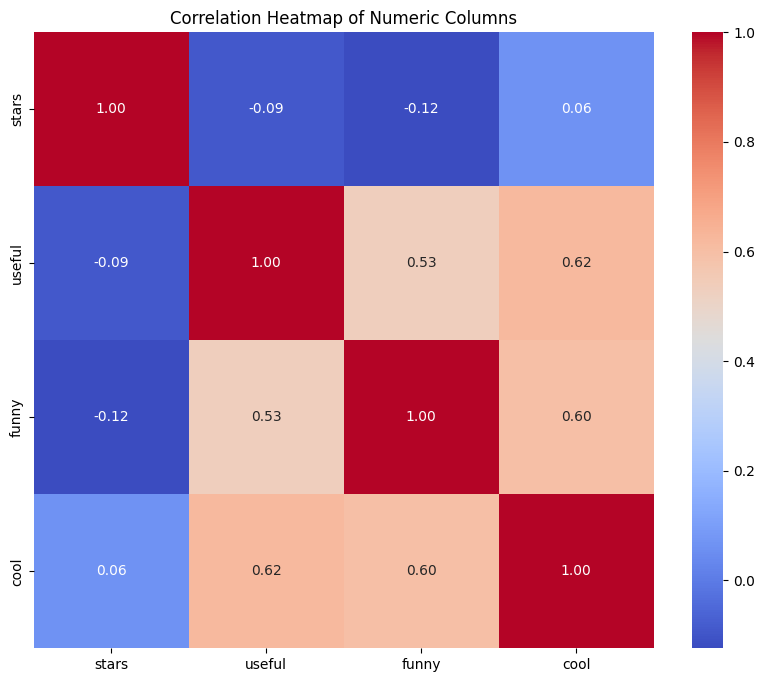

In [41]:
import seaborn as sns

# Heat Map for Numeric Columns
# Select numeric columns for the heat map
numeric_cols = ['stars', 'useful', 'funny', 'cool']

# Compute the correlation matrix
corr_matrix = reviews[numeric_cols].corr()

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

## 4. Reflection Exercise

In this section, you will reflect on your learning experience by answering the following simplified questions. Please provide your answers when prompted by the code.

### Questions:

1. Reflect on your overall learning experience with data analysis in this lab. What stood out to you the most, and how will you use this knowledge moving forward?

   **Example Response**: *What stood out to me the most was how important it is to clean and prepare data before analysis. I learned how to remove duplicates and convert data types, which made my analysis more accurate. Moving forward, I will make sure to always clean my data thoroughly before starting any analysis.*

2. What was the most challenging part of this lab for you, and what steps did you take to overcome this challenge? What did you learn from this experience?

   **Example Response**: *The most challenging part of this lab was understanding the code. I used GenAI as a copilot to answer questions I had about what different things meant. It taught me that its manageable to learn as I go while doing data analysis.*

Run the following two cells and input your answers in the text boxes that show up. Don't forget to press `Return` once you are done typing. In case you made a mistake or want to re-enter your answer, just run the corresponding cell again.

In [42]:
learning_insight = input("Reflect on your overall learning experience with data analysis in this lab. What stood out to you the most, and how will you use this knowledge moving forward? ")

In [43]:
challenge_reflection = input("What was the most challenging part of this lab for you, and what steps did you take to overcome this challenge? What did you learn from this experience? ")

Running the following cell is really important, as this will save the answers you gave above. In case you change your answers to any of the above questions, please be sure to run the following cell again, to save the updated answers.

You needn't be too concerned with what this code is really doing, but the crux is it is doing some string operations to convert your answers to a prompt, and then save that to a `.txt` file.

In [44]:
# Read the prompt template from the file
with open('..\Prompts\Prompt.txt', 'r') as file:
    prompt = file.read()

# Replace placeholders with user input
prompt = prompt.replace('***', learning_insight, 1)
prompt = prompt.replace('***', challenge_reflection, 1)

# Write the updated prompt back to the file
with open('..\Prompts\Prompt.txt', 'w') as file:
    file.write(prompt)

print("Your reflections have been saved.")

FileNotFoundError: [Errno 2] No such file or directory: '..\\Prompts\\Prompt.txt'

## Summary

In this lab, you learned how to build a complete data analysis pipeline:

- **Wrangling**: Handling missing values, removing duplicates, converting data types, merging CSV files, and creating new columns to prepare data for analysis.
- **Analysis**: Conducting descriptive statistics, correlation analysis, grouping and aggregation, trend analysis, and sentiment analysis to gain insights from the data.
- **Visualizations**: Producing bar plots, box plots, scatter plots, line plots, pie charts, and heatmaps to effectively communicate your findings.

Additionally, you learned how to leverage AI to enhance your data analysis skills. By using example prompts and suggested techniques, you explored how AI can assist in wrangling, analyzing, and visualizing data. This experience has provided you with the knowledge and tools to independently tackle data analysis tasks and effectively utilize AI as a resource.